---
## **Introduction**

This file implements the process of calculating the value function of a GridWorld using **Value Iteration**

The policy used selects up, down, left, or right randomly with equal probability.

The GridWorld is represented as follows:

* The flag indicates the starting point.
* The cube represents a wall.
* The bomb signifies a penalty.
* The money symbolizes a reward.

<img src="https://drive.google.com/uc?export=view&id=1UyixvvHu-hOYDmUtHK_ko5pjLUZWnAg1" alt="Gridworld" width="400">


---



In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

class GridWorld:
  def __init__(self):
    # Reward map for the grid
    self.reward_map = np.array([
        [-1, -1, -1, 10],
        [-1, -1, -1, -1],
        [-1, -1, -10, -1]])
    # Value function initialization
    self.value_function = np.array([
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype = np.float32)
    # Action dictionary: Maps actions to (dy, dx) movement
    self.actions_dict = {
        0: (-1, 0),    # UP
        1: (1, 0),     # DOWN
        2: (0, -1),    # LEFT
        3: (0, 1)}     # RIGHT
    # Policy map (initialized with -1 which means random action, NaN for wall)
    self.policy = np.empty(shape = (3, 4), dtype = object)
    self.policy[:] = np.array([
        [-1, -1, -1, -1],
        [-1, np.nan, -1, -1],
        [-1, -1, -1, -1]])
    # Action arrows for display purposes
    self.action_arrows = {0: '↑', 1: '↓', 2: '←', 3: '→', -1: '↔↕'}
    self.num_action = len(self.actions_dict)
    self.height = self.reward_map.shape[0]
    self.width = self.reward_map.shape[1]
    self.gamma = 0.9  # Discount factor
    self.wall_state = (1, 1)  # Wall state at (1, 1)
    self.start_state = (2, 2)  # Starting state
    self.goal_state = (0, 3)  # Goal state
    self.grid_limit = (self.height - 1, self.width - 1)  # Grid boundaries
    self.epsilon = 1e-4

  def value_iteration(self, epsilon = 1e-10):
    self.epsilon = epsilon
    """
    Evaluate the current policy until the value function converges
    """
    count = 0
    while True:
      prior_value_function = self.value_function.copy()
      for y in range(self.height):
        for x in range(self.width):
          if (y, x) == self.wall_state:  # Skip wall state
            continue
          if (y, x) == self.goal_state:
            continue
          new_value = 0
          action_values = []
          for action in range(self.num_action):
            dy, dx = self.actions_dict[action]
            next_state = self.get_next_state(x, y, action)
            action_values.append((self.reward_map[next_state] + self.gamma * self.value_function[next_state]))
          max_action_value = np.max(action_values)
          max_action = np.where(action_values == max_action_value)[0]
          self.policy[y, x] = max_action
          self.value_function[y, x] = max_action_value
      count += 1
      # Check for convergence
      if np.max(np.abs(prior_value_function - self.value_function)) < epsilon:
        print('================================================')
        print(f'Number of iterations until convergence (Δ < {epsilon}): {count}')
        print('================================================')
        break

  def get_next_state(self, x, y, action):
    """
    Get the next state for a given action while handling grid boundaries and walls
    """
    (dy, dx) = self.actions_dict[action]
    next_state = (y + dy, x + dx)
    next_state = (
        max(0, min(self.grid_limit[0], next_state[0])),
        max(0, min(self.grid_limit[1], next_state[1])))
    if next_state == self.wall_state:  # If the next state is a wall, stay in the current state
      next_state = (y, x)
    return next_state

  def render(self, policy_show = True):
    """
    Visualize the grid world with value function and optional policy arrows
    """
    vmin = np.min(self.value_function)
    vmax = np.max(self.value_function)
    colors = ['red', 'white', 'green']
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('colormap_name', colors)
    plt.pcolormesh(np.flipud(self.value_function), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.8)
    for y in range(self.height):
      for x in range(self.width):
        if (y, x) == self.wall_state:
          plt.text(x + 0.5, self.height - y - 0.5, "Wall",
                             ha="center", va="center", fontsize=20, color="purple")
        else:
          if policy_show == True:
            if (y, x) != self.goal_state:  # Do not display policy at the goal state
              for action in self.policy[y, x]:
                  plt.text(x + 0.5, self.height - y - 0.5,
                                   f"{self.action_arrows[action]}",
                                   ha="center", va="center", fontsize=40, color="black")
          # Display value function in the top-left corner of each cell
          plt.text(x + 0.1, self.height - y - 0.1,
                             f"Value: {self.value_function[y, x]: .4f}",
                             ha="left", va="top", fontsize=10, color="black")
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
     # Add grid lines manually
    plt.gca().set_xticks(np.arange(self.width + 1), minor=True)
    plt.gca().set_yticks(np.arange(self.height + 1), minor=True)
    plt.grid(which='minor', color='black', linestyle='-', linewidth=0.7)

    plt.title(f"GridWorld Map, Epsilon: {self.epsilon}", fontsize=16)
    plt.show()


Number of iterations until convergence (Δ < 1e-10): 4


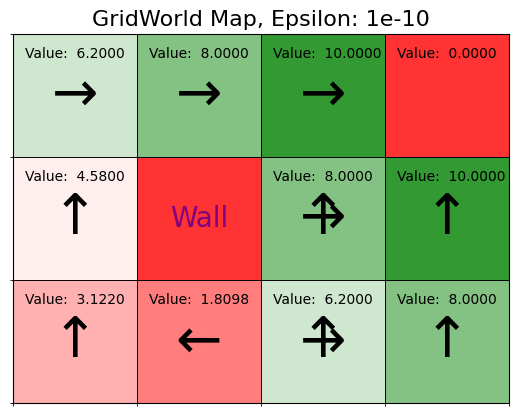

In [16]:
env = GridWorld()
env.value_iteration()
env.render()

---

## **Conclusion**

Value Iteration has the advantage of being simpler than Policy Iteration because policy evaluation and policy improvement occur simultaneously.

In fact, as seen in [Policy Iteration](https://github.com/LeeJunho-AI/Reinforcement_Learning_Study/blob/main/03_Policy_Iteration.ipynb), an additional algorithm is required to improve the policy after evaluating it. However, in the case of Value Iteration, evaluation and improvement are performed simultaneously, which simplifies the code.

---